# PS1.A and PS1.B

The task assigned to us is to develop a Time Series forecasting model to predict future retail sales. We are to take the original code provided to us, and replace the MLP with a CNN network instead.

## Import Libraries

In [28]:
#Imported necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

#configures the notebook to display plots in the notebook rather than in a separate window
%matplotlib inline
#improves resolution of the plots
%config InlineBackend.figure_format='retina' 
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10

## Data

In [17]:
# Original Data Source: https://fred.stlouisfed.org/series/RSXFSN
# from google.colab import files
# uploaded = files.upload()

In [18]:
# Store data in DataFrame
df = pd.read_csv("RSXFSN.csv")

In [19]:
# keep real GDP only
keep_columns = ['RSXFSN']
df = df[keep_columns]
# rescale
df = df/10000

## Data Preprocessing

In [20]:
# split train & test data
n_train = int(len(df) * 0.8) #calculates the number of training samples by taking 80% of the dataframe 
n_test = len(df) - n_train #calculates the remaining 20%
train, test = df.iloc[0:n_train], df.iloc[n_train:len(df)] #splits the dataframe into training and testing sets
print(len(train), len(test))

300 75


In [21]:
def get_timeseries(x, n_steps=1):
    x_ts, y_ts = [], [] #input features and output labels
    for ii in range(len(x) - n_steps): #iterates over the input data minus the number of steps n_steps
        v = x.iloc[ii:(ii + n_steps)].values #creates a slice from the index ii until the index ii+n_steps. Extracts the values in that slice and stores them in v
        x_ts.append(v) #appends v to the input features list
        w = x.iloc[ii + n_steps].values #extracts the output value at ii+n_steps and stores it in w
        y_ts.append(w) #appends the output label
    return np.array(x_ts), np.array(y_ts)

In [22]:
n_steps = 16
n_features = 1

# convert to a time series dimension: [samples, n_steps, n_features]

x_train, y_train = get_timeseries(train, n_steps) #generates input features x_train and output labels y_train
x_test, y_test = get_timeseries(test,n_steps) #does the same but for the testing data

print(x_train.shape, y_train.shape)

(284, 16, 1) (284, 1)


## Modeling

In [23]:
# define model
model = Sequential() #initializes a new sequential model
model.add(Dense(50, activation='relu', input_dim=n_steps)) #dense layer added with 50 neurons, rectified linear unit, and an input dimension of size n_steps
model.add(Dense(1)) #another dense layer of 1 input neuron that is responsible for producing the final prediction for the next step
model.compile(loss='mean_squared_error', optimizer=Adam(0.001)) #specifies the loss function to mean squared error and optimizer to Adam with a learning rate of 0.001

## Training

In [24]:
# fit model
history = model.fit(x_train, y_train,epochs=500,batch_size=32,validation_split=0.1,verbose=1,shuffle=False) #fits the model to the training data 

Epoch 1/500
8/8 [==============================] - 1s 27ms/step - loss: 38.4366 - val_loss: 36.6721
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 20.5510 - val_loss: 10.4398
Epoch 3/500
8/8 [==============================] - 0s 8ms/step - loss: 11.5271 - val_loss: 18.0951
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 6.0259 - val_loss: 11.4033
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 5.2929 - val_loss: 7.7578
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 5.0025 - val_loss: 8.1512
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 4.7629 - val_loss: 8.0347
Epoch 8/500
8/8 [==============================] - 0s 8ms/step - loss: 4.3432 - val_loss: 7.6702
Epoch 9/500
8/8 [==============================] - 0s 7ms/step - loss: 4.3965 - val_loss: 7.4741
Epoch 10/500
8/8 [==============================] - 0s 9ms/step - loss: 4.3496 - val_loss: 7.3818
Epoch 11/500
8/8 [===

## Evaluation

In [25]:
y_pred = model.predict(x_test) #newly trained model is used to predict the test data's output

2/2 [==============================] - 0s 8ms/step


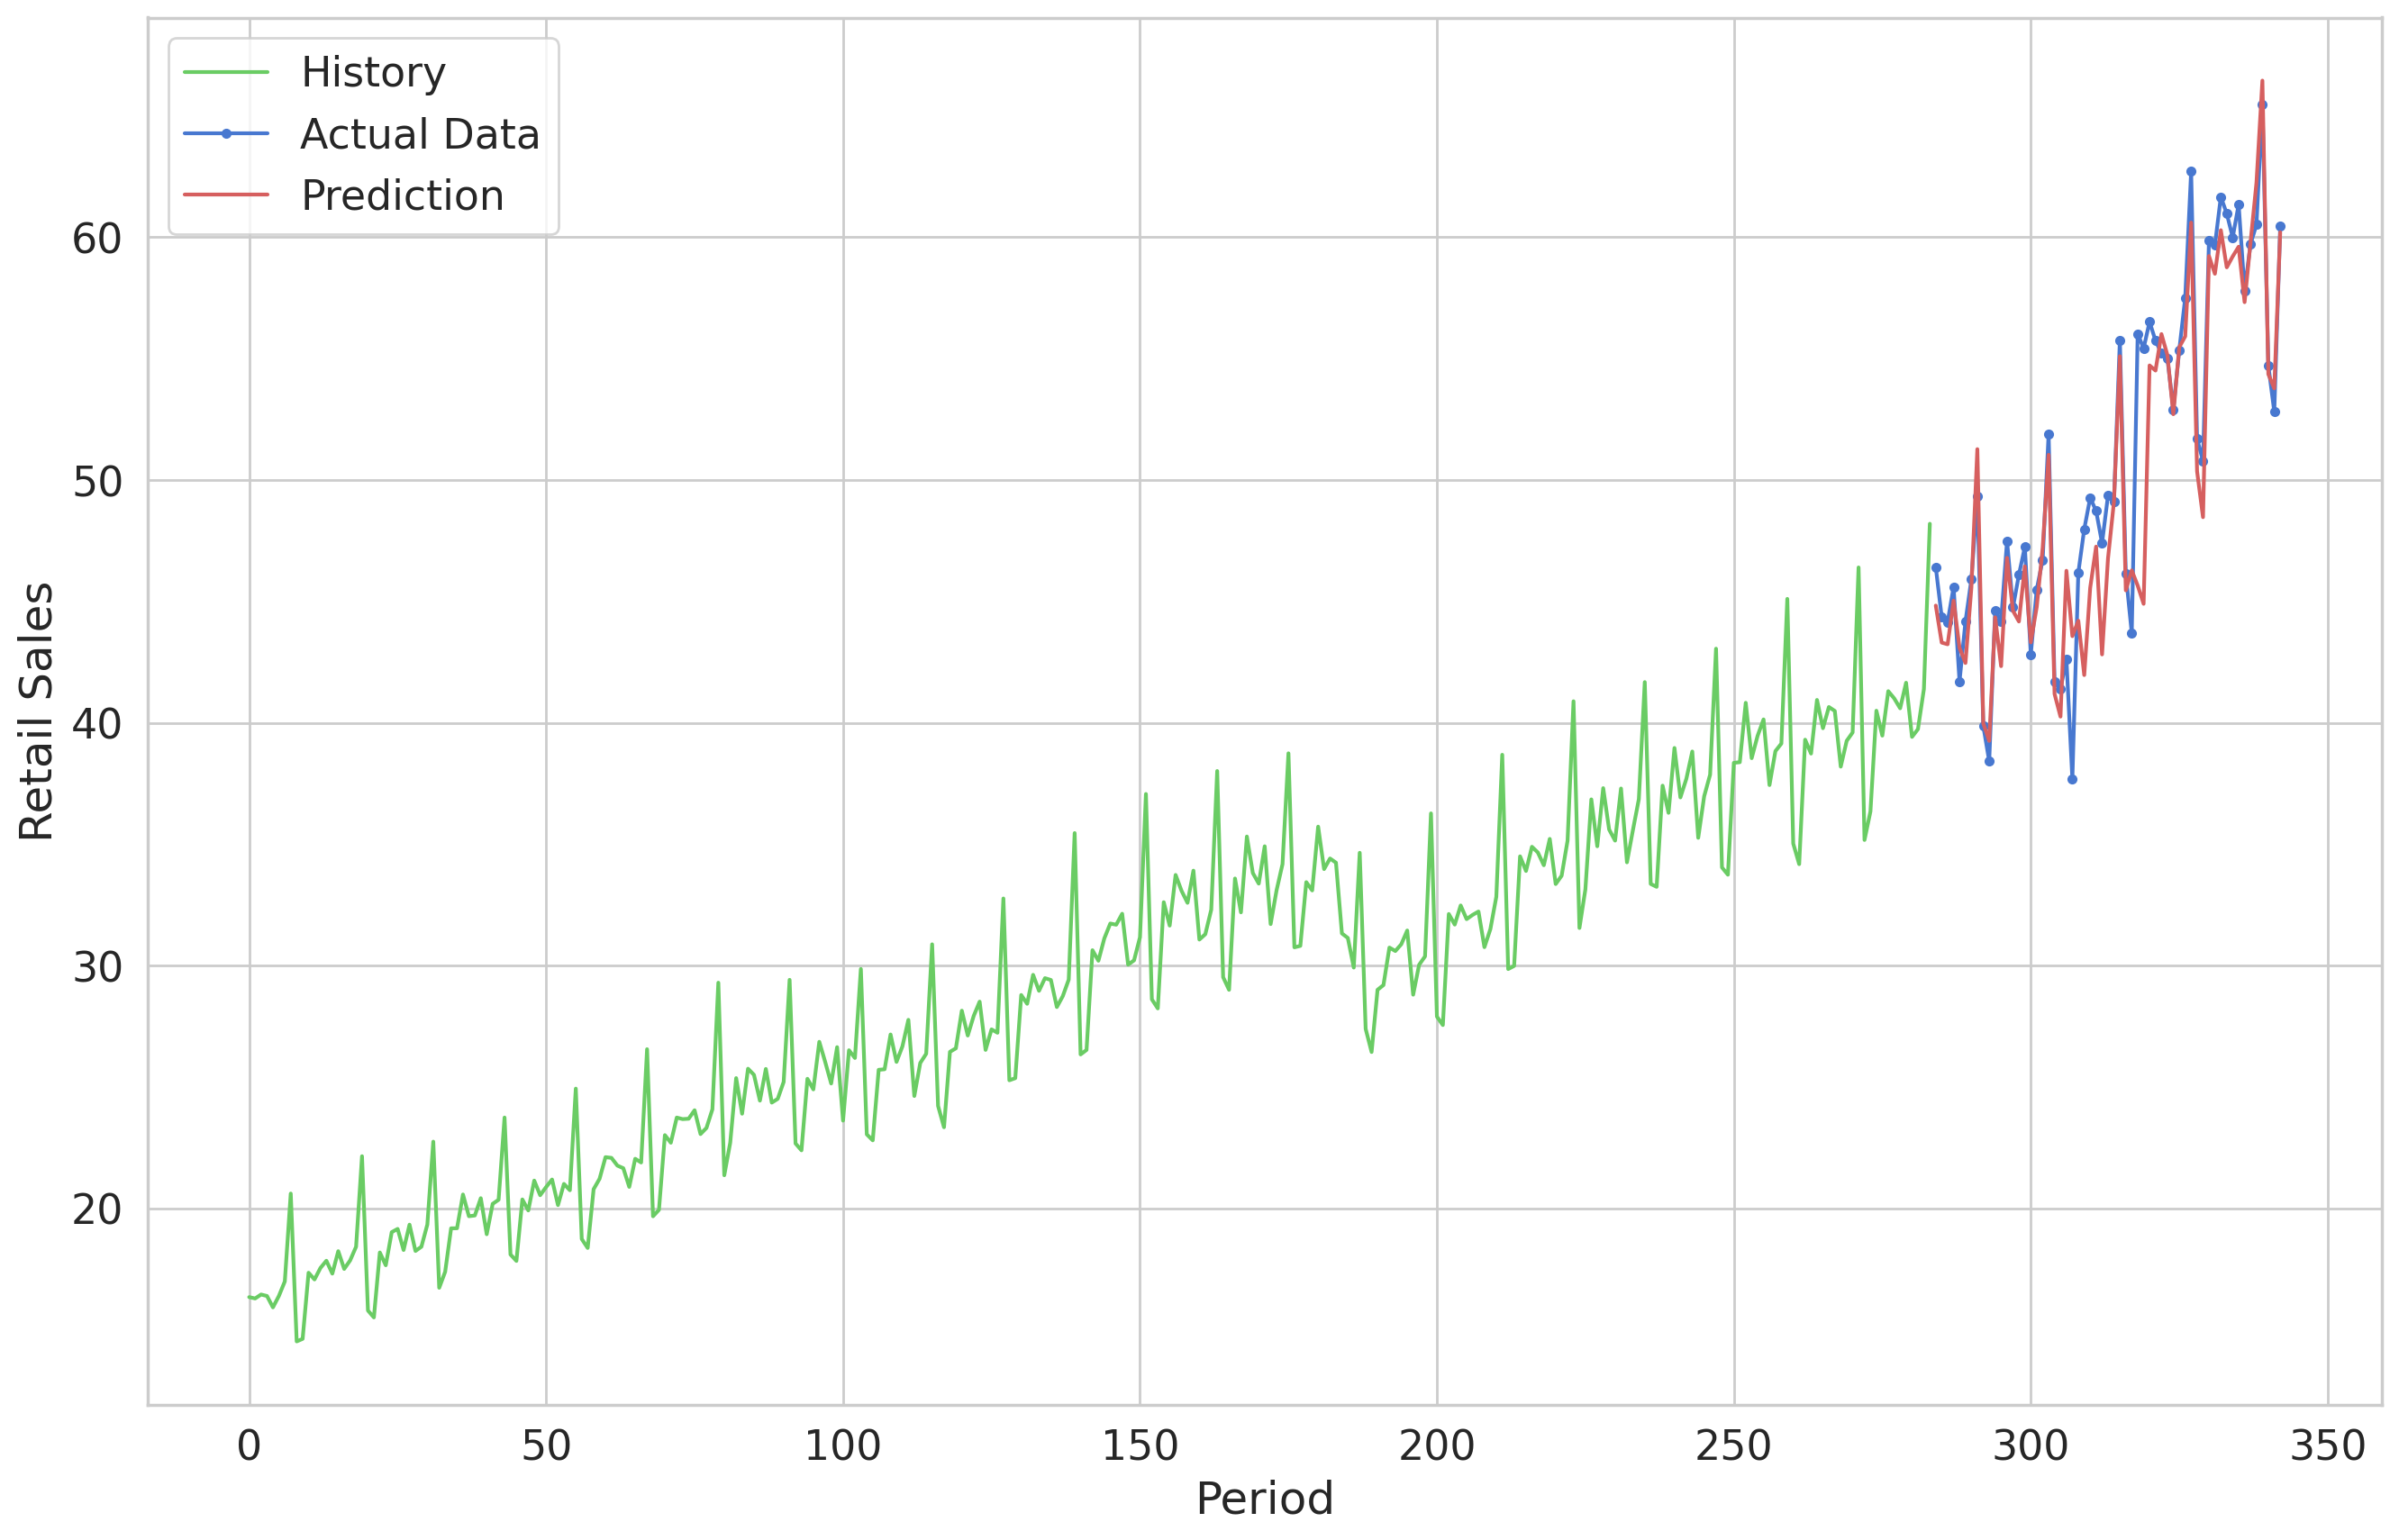

In [26]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual Data")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

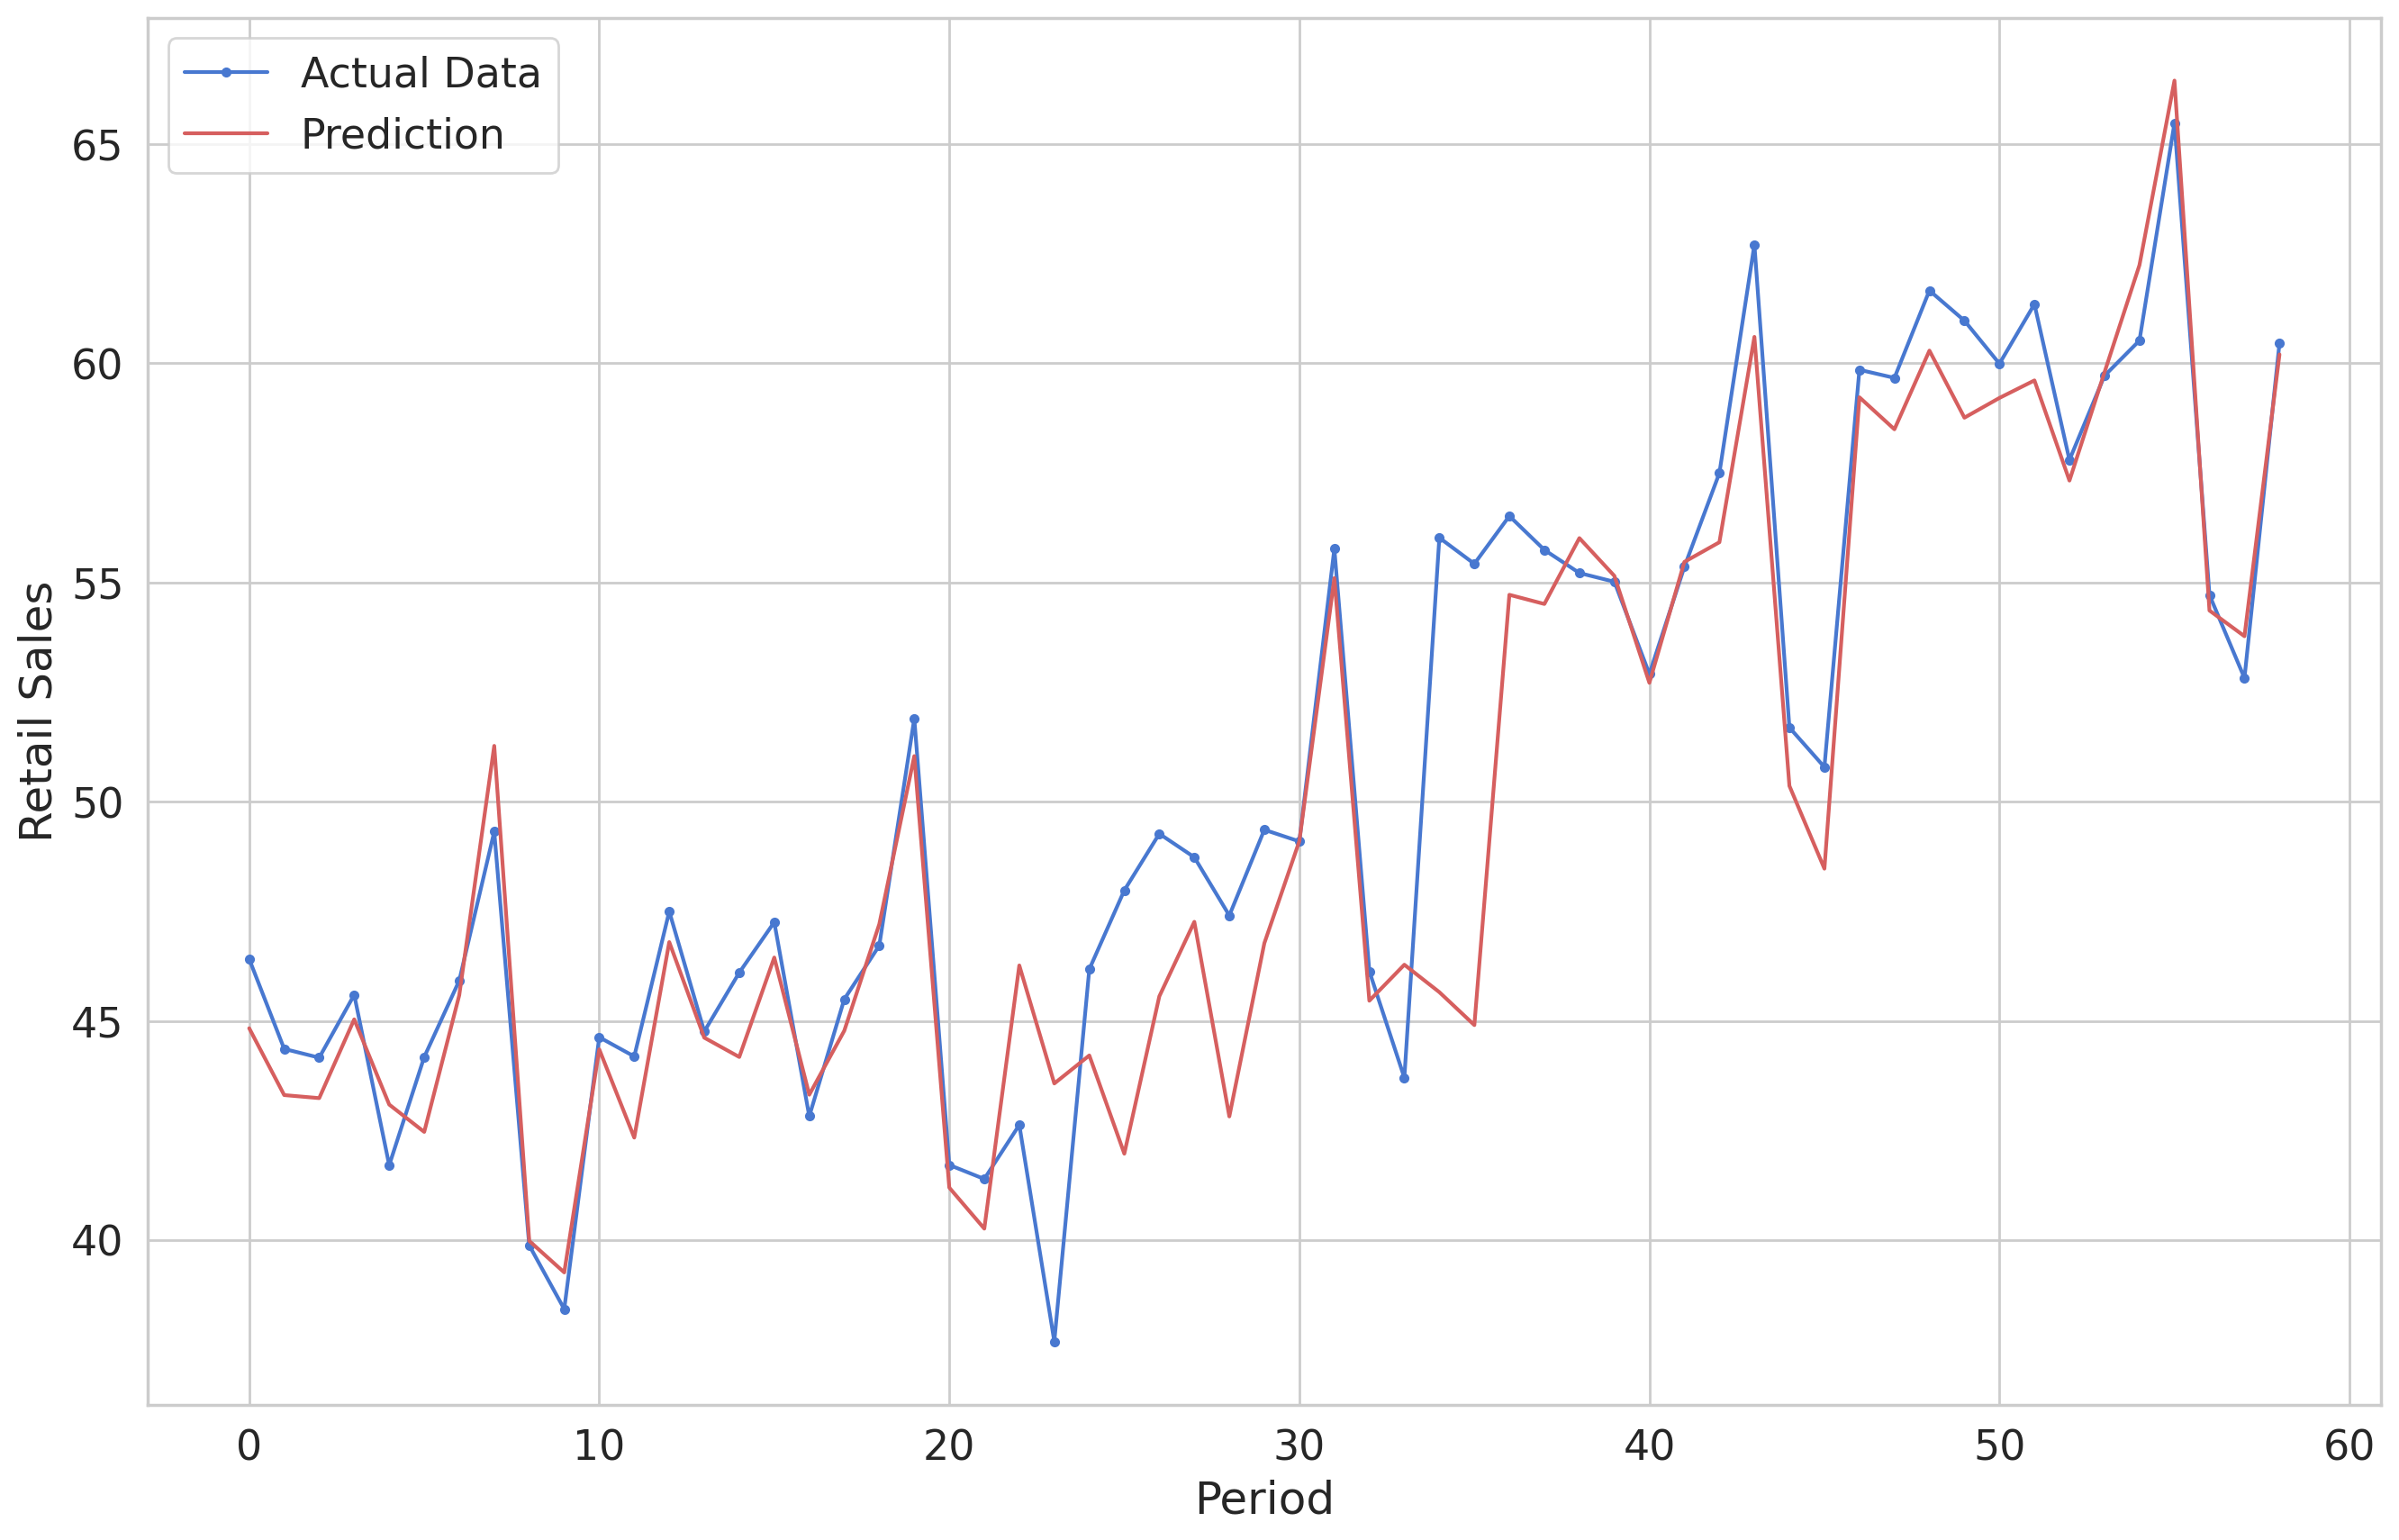

In [27]:
plt.plot(y_test, marker='.', label="Actual Data")
plt.plot(y_pred, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();